# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [3]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [5]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [6]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [11]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

label encoder asignara un valor numerico a cada categoria, en este caso como solo hay 2 sexos (no me funen, es lo que dice el dataset) entonces seran mapeados a una unica variable con valores de 0 y 1. En el caso del One hot encoder generara n columnas diferentes y le asignara un 1 a la columna que correponda a la categoria mientras que dejara en 0 las demas.

### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

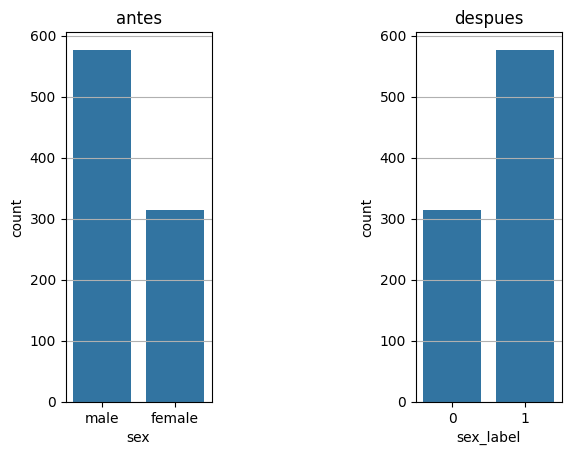

In [28]:
plt.figure()

plt.subplot(1, 3, 1)
sns.countplot(data=data, x="sex")
plt.title("antes")
plt.grid(True, axis="y")
plt.subplot(1, 3, 3)
sns.countplot(data=data, x="sex_label")
plt.title("despues")
plt.grid(True, axis="y")
plt.show()

### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [31]:
# Codificar con OneHotEncoder
class_one_hot = pd.get_dummies(data['class'], prefix='class')
class_one_hot.head()

,class_First,class_Second,class_Third
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


en el caso de las variables cuyas categorias no guardan una relacion ordinal (ejemplo pequeño, mediano, grande) usar el label encoder tiene poco sentido, usar one hot encoding tiene la propiedad de que los vectores de las categorias son ortogonales y por lo tanto linealmente idenpendiente. algo que que muchos algoritmos de machine learning aprovechan bastante a la hora del aprendizaje e inferencia

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

teniendo en cuenta la respuesta anterior: si es ordinal el label encoding, si es categorica entonces el one hot encoding, si la variable tuviera una cardinalidad alta ejemplo palabras para un modelo llm entonces un embedding.